In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder

import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print(os.listdir('./home-credit-default-risk/'))

['HomeCredit_columns_description.csv', 'sample_submission.csv', 'bureau_balance.csv', 'application_train.csv', 'previous_application.csv', 'credit_card_balance.csv', 'bureau.csv', 'installments_payments.csv', 'application_test.csv', 'POS_CASH_balance.csv']


In [3]:
descript_df = pd.read_csv('./home-credit-default-risk/HomeCredit_columns_description.csv', encoding='ISO-8859-1')
descript_df[descript_df['Table'] == 'application_{train|test}.csv']

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...,...
117,120,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_DAY,Number of enquiries to Credit Bureau about the...,NaN
118,121,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_WEEK,Number of enquiries to Credit Bureau about the...,NaN
119,122,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_MON,Number of enquiries to Credit Bureau about the...,NaN
120,123,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_QRT,Number of enquiries to Credit Bureau about the...,NaN


In [49]:
app_train = pd.read_csv('./home-credit-default-risk/application_train.csv')
app_test = pd.read_csv('./home-credit-default-risk/application_test.csv')
df = pd.concat([app_test, app_train]).reset_index()

## Dữ liệu có bao nhiêu dòng, cột

In [50]:
print(f'Dữ liệu có {df.shape[0]} dòng và {df.shape[1]} cột')

Dữ liệu có 356255 dòng và 123 cột


## Dữ liệu có bị trùng hay không?

In [51]:
df.duplicated().sum()

0

##  Dữ liệu có gì bất thường không?

In [52]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356255 entries, 0 to 356254
Data columns (total 123 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    index                         356255 non-null  int64  
 1    SK_ID_CURR                    356255 non-null  int64  
 2    NAME_CONTRACT_TYPE            356255 non-null  object 
 3    CODE_GENDER                   356255 non-null  object 
 4    FLAG_OWN_CAR                  356255 non-null  object 
 5    FLAG_OWN_REALTY               356255 non-null  object 
 6    CNT_CHILDREN                  356255 non-null  int64  
 7    AMT_INCOME_TOTAL              356255 non-null  float64
 8    AMT_CREDIT                    356255 non-null  float64
 9    AMT_ANNUITY                   356219 non-null  float64
 10   AMT_GOODS_PRICE               355977 non-null  float64
 11   NAME_TYPE_SUITE               354052 non-null  object 
 12   NAME_INCOME_TYPE            

In [53]:
for col in df.select_dtypes('O'):
    print(f'Các giá trị của cột categorical {col}')
    print(df[col].unique())
    print('===========================')

Các giá trị của cột categorical NAME_CONTRACT_TYPE
['Cash loans' 'Revolving loans']
Các giá trị của cột categorical CODE_GENDER
['F' 'M' 'XNA']
Các giá trị của cột categorical FLAG_OWN_CAR
['N' 'Y']
Các giá trị của cột categorical FLAG_OWN_REALTY
['Y' 'N']
Các giá trị của cột categorical NAME_TYPE_SUITE
['Unaccompanied' nan 'Family' 'Spouse, partner' 'Group of people'
 'Other_B' 'Children' 'Other_A']
Các giá trị của cột categorical NAME_INCOME_TYPE
['Working' 'State servant' 'Pensioner' 'Commercial associate'
 'Businessman' 'Student' 'Unemployed' 'Maternity leave']
Các giá trị của cột categorical NAME_EDUCATION_TYPE
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
Các giá trị của cột categorical NAME_FAMILY_STATUS
['Married' 'Single / not married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
Các giá trị của cột categorical NAME_HOUSING_TYPE
['House / apartment' 'With parents' 'Rented apartment'
 'Municipal apartment' 'Off

**Nhận xét**:
- pass

## Missing Value

In [9]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [54]:
missing_values = missing_values_table(df)
missing_values.head(20)

Your selected dataframe has 123 columns.
There are 68 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,248360,69.70
COMMONAREA_MODE,248360,69.70
COMMONAREA_AVG,248360,69.70
NONLIVINGAPARTMENTS_AVG,246861,69.30
NONLIVINGAPARTMENTS_MEDI,246861,69.30
NONLIVINGAPARTMENTS_MODE,246861,69.30
FONDKAPREMONT_MODE,243092,68.20
LIVINGAPARTMENTS_AVG,242979,68.20
LIVINGAPARTMENTS_MEDI,242979,68.20
LIVINGAPARTMENTS_MODE,242979,68.20


## Column Types

In [11]:
df.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

In [12]:
df.select_dtypes('object').apply(pd.Series.nunique, axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

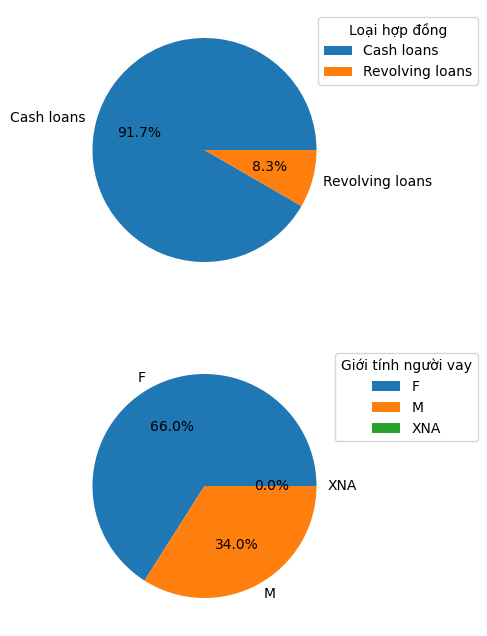

In [55]:
figure, axs = plt.subplots(2, 1, figsize=(8, 8))
contract_counts = df['NAME_CONTRACT_TYPE'].value_counts()
code_gender = df['CODE_GENDER'].value_counts()
axs[0].pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%')
axs[0].legend(title="Loại hợp đồng", loc="best", bbox_to_anchor=(1, 0, 0.5, 1))
axs[1].pie(code_gender, labels=code_gender.index, autopct='%1.1f%%')
axs[1].legend(title="Giới tính người vay", loc="best", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

- **Cash Loans**: Là khoản vay một lần, người vay sẽ nhận được toàn bộ số tiền được yêu cầu vào thời điểm đầu tiên. Người vay sẽ phải trả lại khoản vay và lãi suất theo một khoảng thời gian nhất định, thông thường theo các đợt trả nợ định kỳ. Khoản vay này thường được sử dụng để mua nhà, mua ô tô, trả nợ học phí hoặc trang trải các chi phí lớn khác. Người vay sẽ phải cung cấp bằng chứng thu nhập và tài sản đảm bảo để đảm bảo khả năng trả nợ.

- **Revolving Loans**: Là một khoản vay có giới hạn tín dụng mà bạn có thể sử dụng bất kỳ lúc nào. Người vay có thể vay tiền lên đến giới hạn tín dụng và trả lại khoản vay và lãi suất theo các đợt trả nợ định kỳ.Người vay không cần đảm bảo bằng tài sản và không cần cung cấp bằng chứng thu nhập.

## `FLAG_OWN_CAR` , `FLAG_OWN_REALTY`

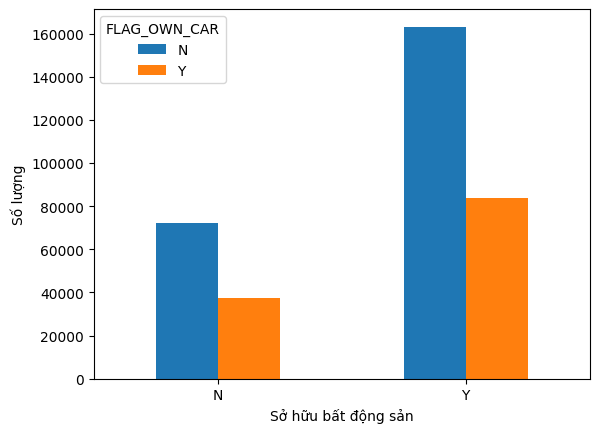

In [56]:
freq_table = pd.crosstab(df['FLAG_OWN_REALTY'], df['FLAG_OWN_CAR'])
freq_table.plot.bar()
plt.xlabel('Sở hữu bất động sản')
plt.ylabel('Số lượng')
plt.xticks(rotation=0)
plt.show()

In [15]:
freq_table

FLAG_OWN_CAR,N,Y
FLAG_OWN_REALTY,,
N,61972,32227
Y,140952,72360


**Nhận xét**:
- Trong số 140952 hồ sơ sở hữu bất động sản, có 72360 hồ sơ cũng sở hữu xe hơi (`FLAG_OWN_CAR` = Y), chiếm khoảng 75% tổng số hồ sơ sở hữu bất động sản.
- Trong số 96212 hồ sơ không sở hữu bất động sản, có 32227 hồ sơ sở hữu xe hơi (`FLAG_OWN_CAR` = Y), chiếm khoảng 33.5% tổng số hồ sơ không sở hữu bất động sản.

Từ kết quả trên, ta có thể kết luận rằng việc sở hữu bất động sản và sở hữu xe hơi có mối tương quan nhất định, tức là người sở hữu bất động sản có xu hướng sở hữu xe hơi hơn so với người không sở hữu bất động sản. Tuy nhiên, điều này không đồng nghĩa với việc sở hữu xe hơi là điều kiện cần để sở hữu bất động sản, vì vẫn có rất nhiều người không sở hữu xe hơi nhưng vẫn sở hữu bất động sản.

## `CNT_CHILDREN`, `CNT_FAM_MEMBERS`

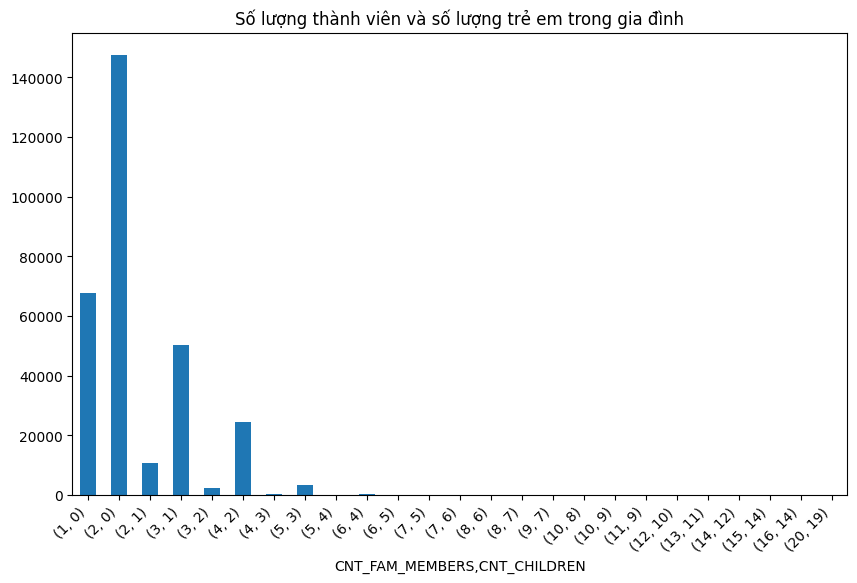

In [16]:
fig = plt.figure(figsize=(10, 6))
children_by_family_members = app_train.groupby('CNT_FAM_MEMBERS')['CNT_CHILDREN'].value_counts()
children_by_family_members.plot.bar()
idx = children_by_family_members.index
children_by_family_members.index = children_by_family_members.index.set_levels([idx.levels[0].astype('int'),
                                                                                idx.levels[-1]])
ax = plt.gca()
ax.set_xticklabels(children_by_family_members.index, rotation=45, ha='right')
plt.title('Số lượng thành viên và số lượng trẻ em trong gia đình')
plt.show()

**Nhận xét**:
- Hầu hết các gia đình trong dữ liệu đều có từ 1 đến 4 thành viên, với số trẻ em trong gia đình từ 0 đến 3.
- Có một số gia đình lớn hơn, với từ 5 đến 20 thành viên và số trẻ em trong gia đình lên đến 19.
- Số lượng thành viên gia đình không lớn hơn 2 với số lượng trẻ em, vậy người vay không có ảnh hưởng bởi bố mẹ của họ.
- Số lượng (2, 0) nhiều nhất, nghĩa là đa số 2 vợ chồng chưa có con vay chiếm số lượng lớn khách hàng vay

## `AMT_INCOME_TOTAL`, `AMT_CREDIT`, `AMT_ANNUITY`, `AMT_GOODS_PRICE`

In [17]:
amt = app_train[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']]
pd.options.display.float_format = '{:.2f}'.format
amt.describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
count,307511.00,307511.00,307499.00,307233.00
mean,168797.92,599026.00,27108.57,538396.21
std,237123.15,402490.78,14493.74,369446.46
min,25650.00,45000.00,1615.50,40500.00
25%,112500.00,270000.00,16524.00,238500.00
50%,147150.00,513531.00,24903.00,450000.00
75%,202500.00,808650.00,34596.00,679500.00
max,117000000.00,4050000.00,258025.50,4050000.00


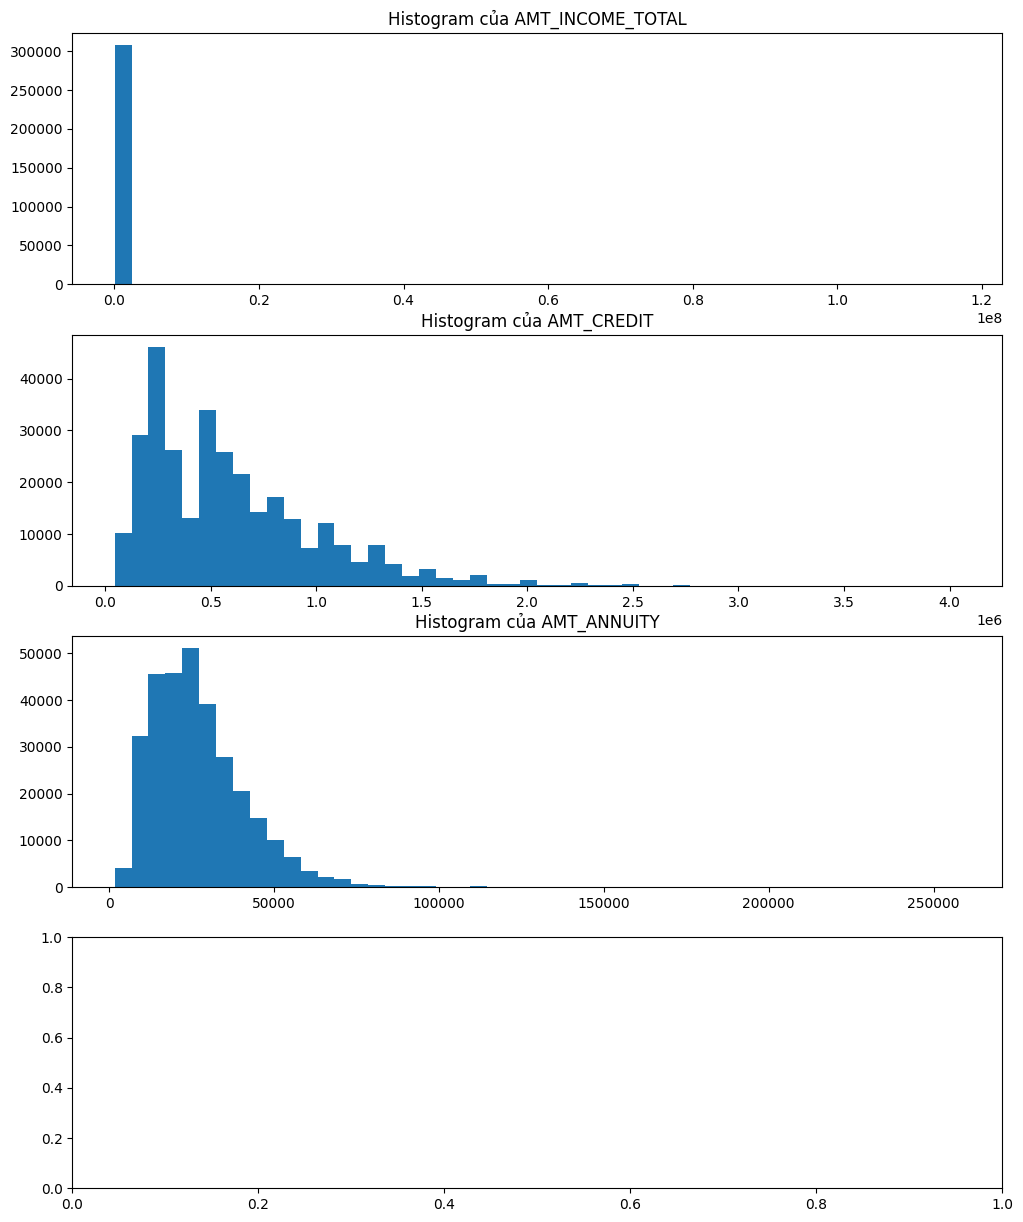

In [18]:
fig, axs = plt.subplots(4, 1, figsize=(12, 15))
for i, col in enumerate(amt.columns[:-1]):
    axs[i].hist(amt[col], bins=50)
    axs[i].set_title(f'Histogram của {col}')

**Nhận xét**
- `AMT_INCOME_TOTAL` khả năng cao có outlier vì giá trị max của nó gấp gần 50 lần khoảng 75%
- Các biến số đều có giá trị lớn nhất và nhỏ nhất khác biệt rất lớn, cho thấy sự đa dạng trong dữ liệu và sự khác biệt lớn về khả năng tài chính của các cá nhân trong tập dữ liệu.
- Giá trị trung bình (mean) của biến `AMT_INCOME_TOTAL` thấp hơn giá trị trung bình của biến `AMT_CREDIT` và `AMT_GOODS_PRICE`, cho thấy có một số người có thu nhập thấp hơn so với số tiền vay hoặc giá trị của tài sản mà họ mua bằng số tiền vay.

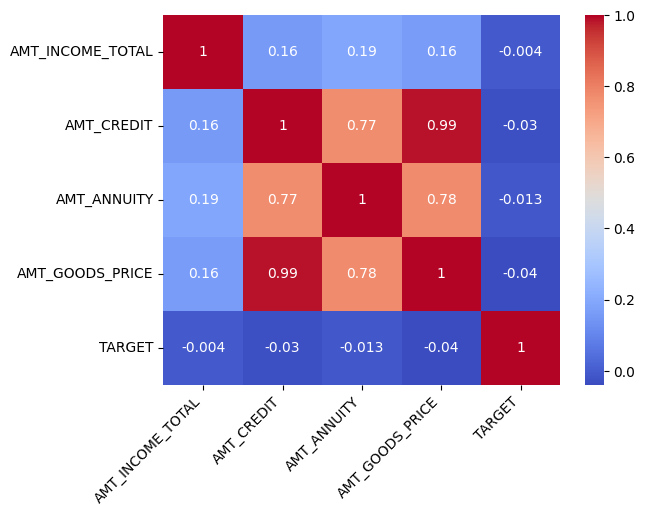

In [19]:
amt['TARGET'] = app_train['TARGET']
ax = sns.heatmap(amt.corr(), annot=True, cmap='coolwarm')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

**Nhận xét**
- `AMT_CREDIT` và `AMT_GOODS_PRICE` có tương quan dương mạnh với giá trị tương quan là 0.99. Điều này có nghĩa là giá trị của tài sản mua và số tiền vay mượn có mối quan hệ rất mạnh với nhau. Nên chỉ cần một trong 2 thuộc tính này trong bộ dữ liệu
- `AMT_CREDIT` và `AMT_ANNUITY` có tương quan dương mạnh với giá trị tương quan là 0.77. Điều này có nghĩa là khi số tiền vay mượn tăng thì khoản trả hàng tháng cũng tăng, và ngược lại.

In [20]:
children_by_family_members.index.levels[0].astype('int')

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 20], dtype='int64', name='CNT_FAM_MEMBERS')

## `NAME_TYPE_SUITE`,  `NAME_INCOME_TYPE` , `NAME_EDUCATION_TYPE`, `NAME_FAMILY_STATUS`, 

In [21]:
name = app_train[['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']]
pd.options.display.float_format = '{:.2f}'.format
name.describe()

,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE
count,306219,307511,307511,307511,307511
unique,7,8,5,6,6
top,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment
freq,248526,158774,218391,196432,272868


- `NAME_TYPE_SUITE`: Đây là thuộc tính mô tả thông tin về người đi cùng với khách hàng khi họ đến nơi đăng ký vay tiền. Ví dụ, người đi cùng có thể là vợ/chồng, người yêu, bố/mẹ hoặc bạn bè. Các giá trị có thể có cho thuộc tính này bao gồm: Unaccompanied (không có ai đi cùng), Spouse/Partner (vợ/chồng hoặc người yêu), Children (con cái), Family (gia đình), Other_A (khác), Other_B (khác), Group of people (nhóm người).
- `NAME_INCOME_TYPE`: Đây là thuộc tính mô tả thông tin về loại thu nhập của khách hàng. Các giá trị có thể có cho thuộc tính này bao gồm: Working (lao động), State servant (công chức), Commercial associate (liên kết thương mại), Pensioner (người hưởng lương hưu), Student (sinh viên), Unemployed (thất nghiệp), Businessman (doanh nhân), Maternity leave (nghỉ thai sản), và khác (Other).
- `NAME_EDUCATION_TYPE`: Đây là thuộc tính mô tả thông tin về trình độ học vấn cao nhất của khách hàng. Các giá trị có thể có cho thuộc tính này bao gồm: Lower secondary (trung học cơ sở), Secondary / secondary special (trung học phổ thông / trung học phổ thông chuyên nghiệp), Incomplete higher (trung học không hoàn thành), Higher education (đại học), Academic degree (học vị).
- `NAME_FAMILY_STATUS`: Đây là thuộc tính mô tả thông tin về tình trạng hôn nhân và gia đình của khách hàng. Các giá trị có thể có cho thuộc tính này bao gồm: Single / not married (độc thân / chưa kết hôn), Married (đã kết hôn), Civil marriage (kết hôn dân sự), Widow (góa phụ), Separated (ly thân / chia tay), và khác (Other).
- `NAME_HOUSING_TYPE`: Đây là thuộc tính mô tả thông tin về tình trạng sở hữu nhà cửa của khách hàng. Các giá trị có thể có cho thuộc tính này bao gồm: House / apartment (nhà / căn hộ), Rented apartment (căn hộ thuê), With parents (sống với bố mẹ), Municipal apartment (căn hộ chung cư), Office apartment (căn hộ văn phòng), Co-op apartment (căn hộ thuộc hợp tác xã).

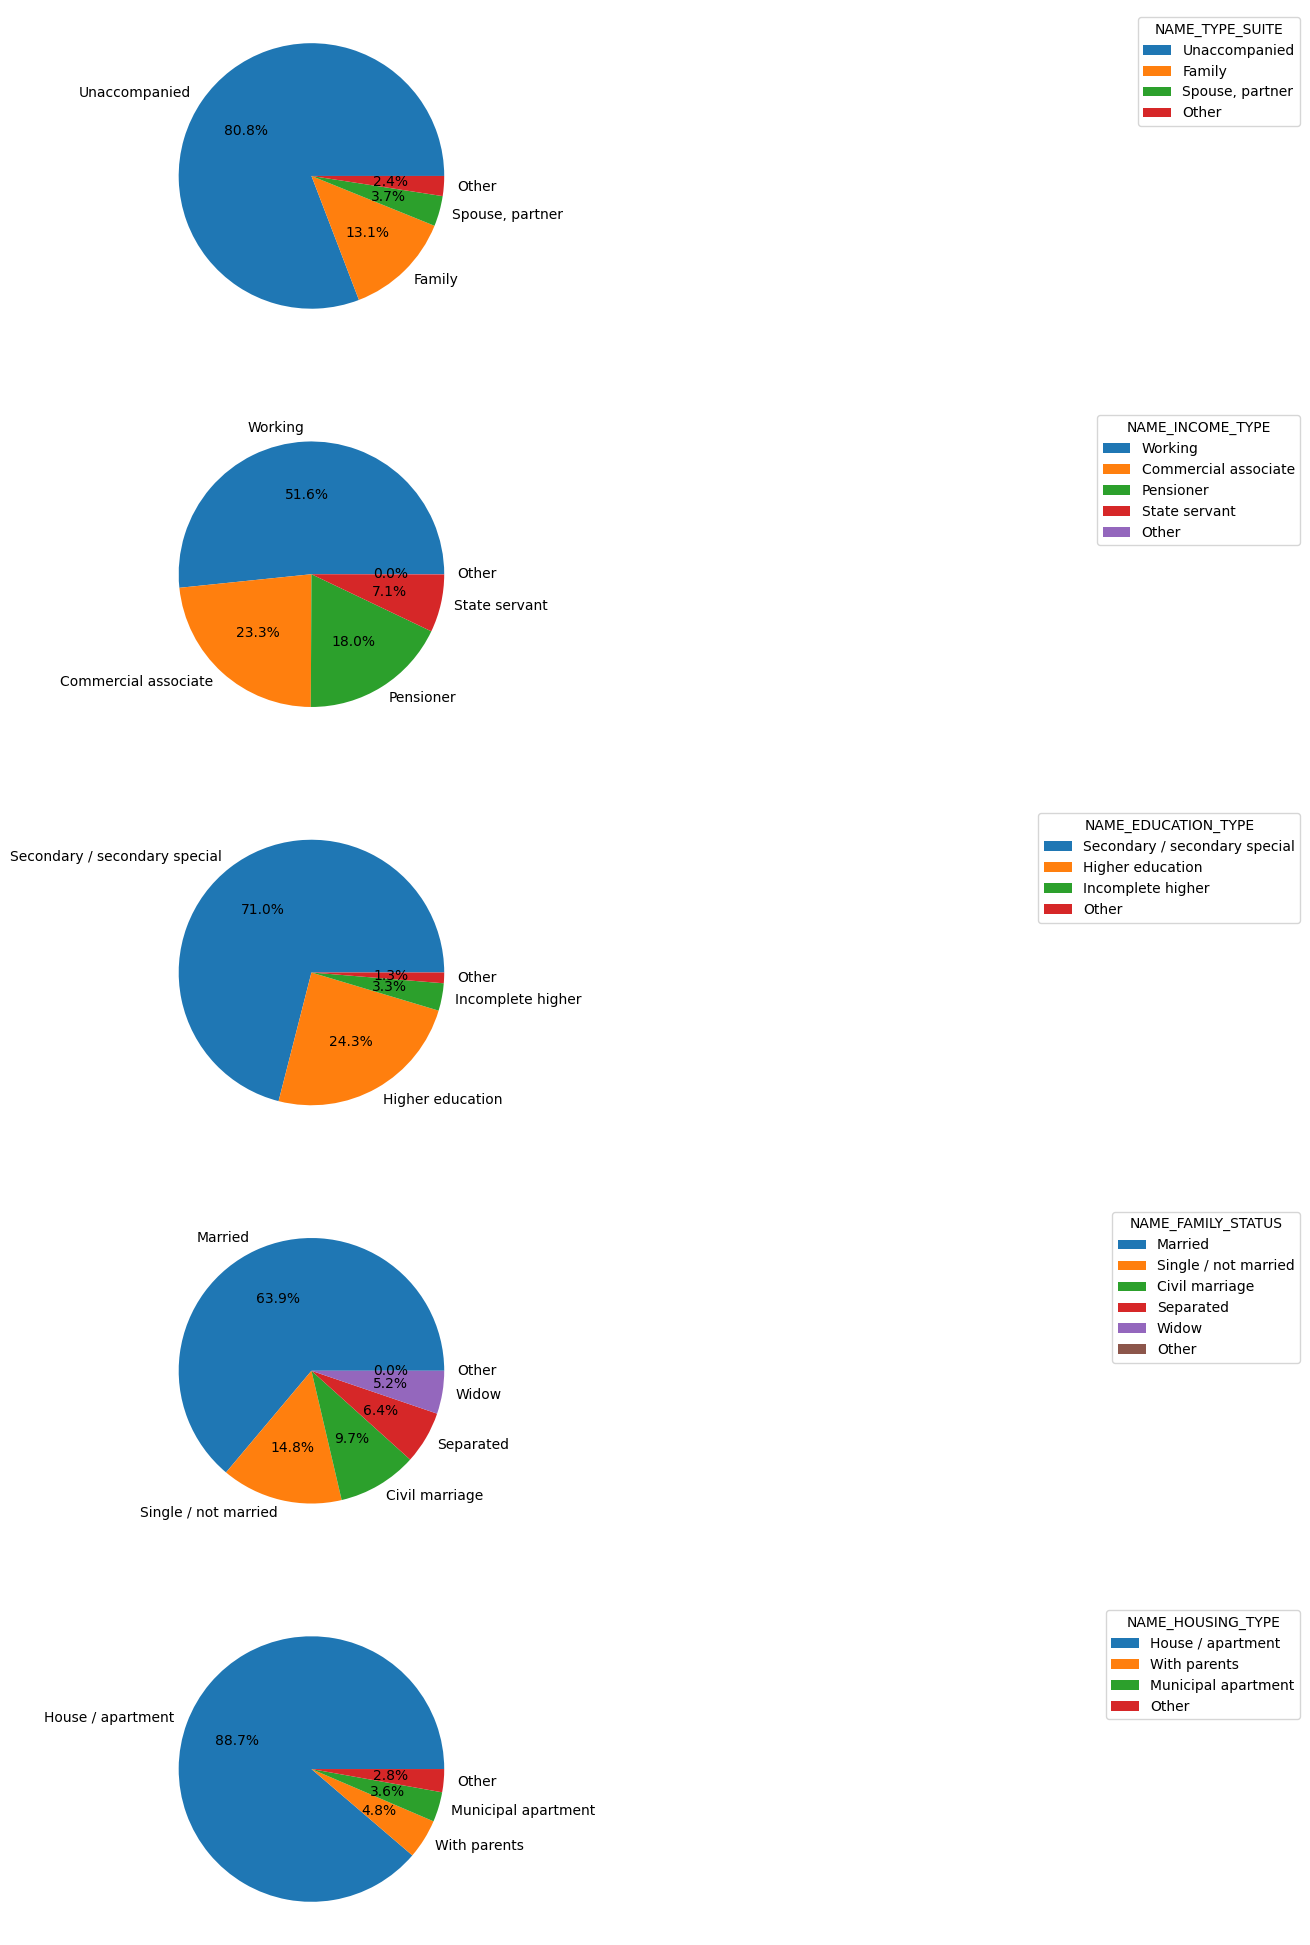

In [22]:
figure, axs = plt.subplots(5, 1, subplot_kw=dict(aspect="equal"), figsize=(8, 25))
# min % to show
threshold = 2

temp = name['NAME_TYPE_SUITE'].value_counts()
temp = temp[temp > len(name) * threshold / 100]
temp = pd.concat([temp, pd.Series(data=[len(name) - temp.sum()], index=['Other'])])
axs[0].pie(temp, labels=temp.index, autopct='%1.1f%%')
axs[0].legend(title="NAME_TYPE_SUITE", loc="best", bbox_to_anchor=(3, 0, 0.5, 1))

temp = name['NAME_INCOME_TYPE'].value_counts()
temp = temp[temp > len(name) * threshold / 100]
temp = pd.concat([temp, pd.Series(data=[len(name) - temp.sum()], index=['Other'])])
axs[1].pie(temp, labels=temp.index, autopct='%1.1f%%')
axs[1].legend(title="NAME_INCOME_TYPE", loc="best", bbox_to_anchor=(3, 0, 0.5, 1))


temp = name['NAME_EDUCATION_TYPE'].value_counts()
temp = temp[temp > len(name) * threshold / 100]
temp = pd.concat([temp, pd.Series(data=[len(name) - temp.sum()], index=['Other'])])
axs[2].pie(temp, labels=temp.index, autopct='%1.1f%%')
axs[2].legend(title="NAME_EDUCATION_TYPE", loc="best", bbox_to_anchor=(3, 0, 0.5, 1))

temp = name['NAME_FAMILY_STATUS'].value_counts()
temp = temp[temp > len(name) * threshold / 100]
temp = pd.concat([temp, pd.Series(data=[len(name) - temp.sum()], index=['Other'])])
axs[3].pie(temp, labels=temp.index, autopct='%1.1f%%')
axs[3].legend(title="NAME_FAMILY_STATUS", loc="best", bbox_to_anchor=(3, 0, 0.5, 1))


temp = name['NAME_HOUSING_TYPE'].value_counts()
temp = temp[temp > len(name) * threshold / 100]
temp = pd.concat([temp, pd.Series(data=[len(name) - temp.sum()], index=['Other'])])
axs[4].pie(temp, labels=temp.index, autopct='%1.1f%%')
axs[4].legend(title="NAME_HOUSING_TYPE", loc="best", bbox_to_anchor=(3, 0, 0.5, 1))

plt.show()

**Nhận xét**:

Chúng ta có thể thấy rằng hầu hết các khách hàng trong tập dữ liệu đều không có người đi cùng (Unaccompanied) và hầu hết đều làm việc (Working). Chúng ta cũng có thể thấy rằng hầu hết các khách hàng trong tập dữ liệu đều có học vấn trung cấp/ trung học phổ thông (Secondary / secondary special) và số lượng khách hàng ở các loại hình nhà ở (NAME_HOUSING_TYPE) chủ yếu là nhà / căn hộ (House / apartment).

## `DAYS_BIRTH`, `DAYS_EMPLOYED`,  `DAYS_REGISTRATION`, `DAYS_ID_PUBLISH`, `DAYS_LAST_PHONE_CHANGE`

In [27]:
days = app_train[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']].head()
days.sample(5)

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
2,-19046,-225,-4260.00,-2531,-815.00
0,-9461,-637,-3648.00,-2120,-1134.00
4,-19932,-3038,-4311.00,-3458,-1106.00
3,-19005,-3039,-9833.00,-2437,-617.00
1,-16765,-1188,-1186.00,-291,-828.00


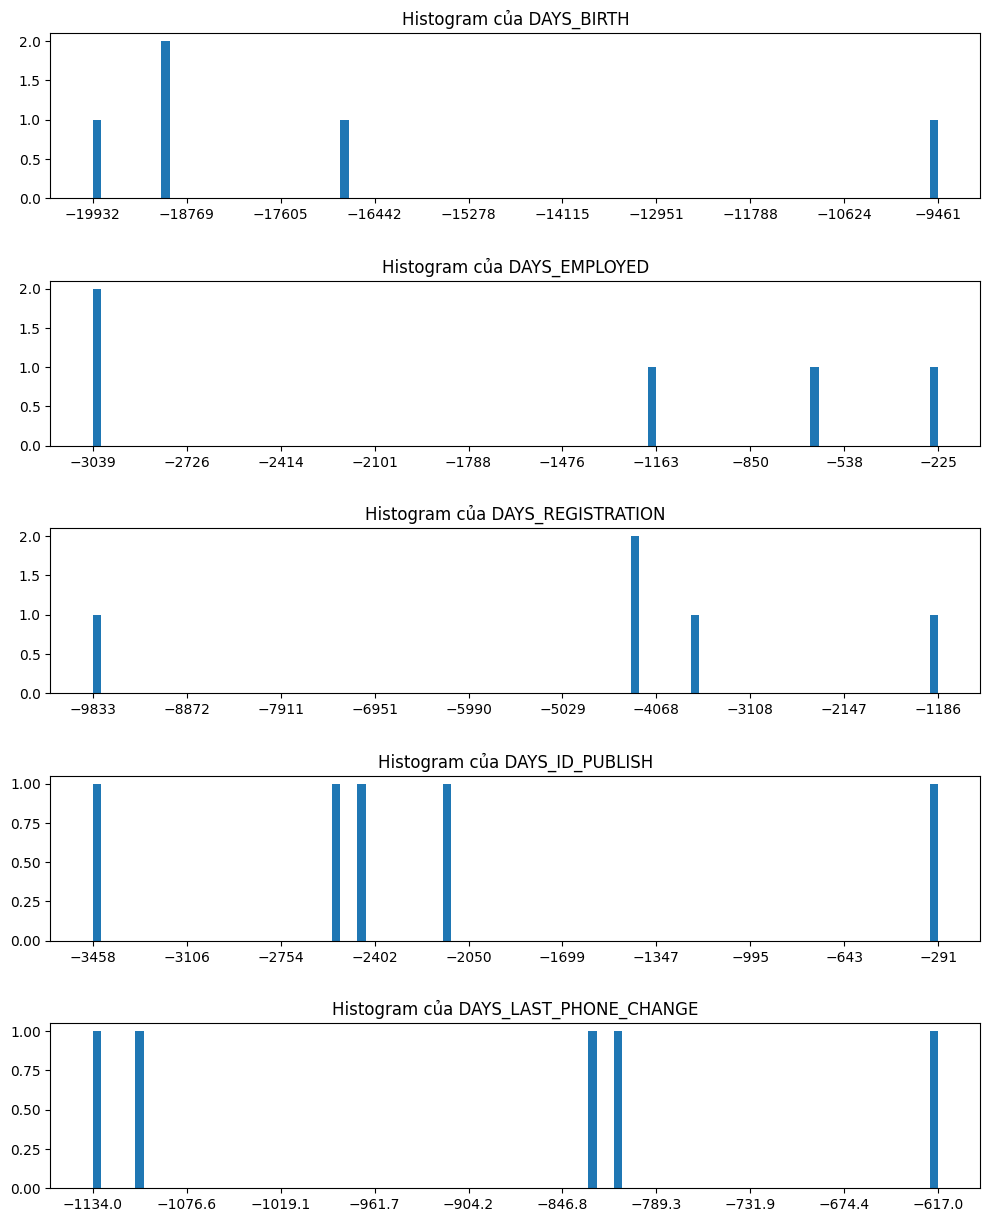

In [33]:
fig, axs = plt.subplots(5, 1, figsize=(12, 15))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, col in enumerate(days.columns):
    axs[i].hist(days[col], bins=np.linspace(days[col].min(), days[col].max(), 100))
    axs[i].set_title(f'Histogram của {col}')
    axs[i].set_xticks(np.linspace(days[col].min(), days[col].max(), 10))

In [35]:
app_test = pd.read_csv('./home-credit-default-risk/application_test.csv')

In [ ]:
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(app_train['DAYS_BIRTH'] / -365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

## Label Encoding

In [64]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [65]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


## Aligning Training and Testing Data

In [66]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


## Anomalies

In [67]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [68]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

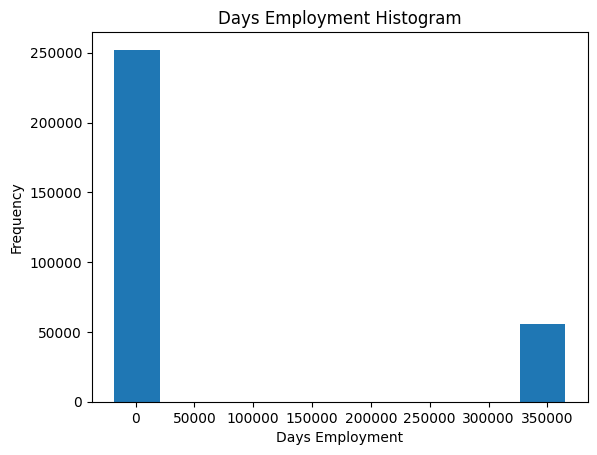

In [69]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

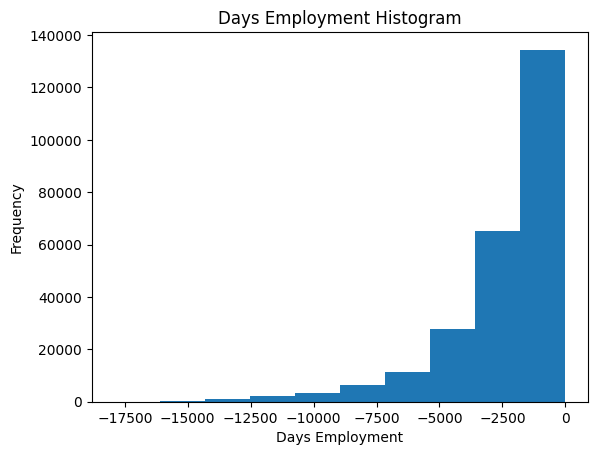

In [70]:
# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [71]:
correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

In [72]:
app_train['DAYS_BIRTH']

0         -9461
1        -16765
2        -19046
3        -19005
4        -19932
          ...  
307506    -9327
307507   -20775
307508   -14966
307509   -11961
307510   -16856
Name: DAYS_BIRTH, Length: 307511, dtype: int64

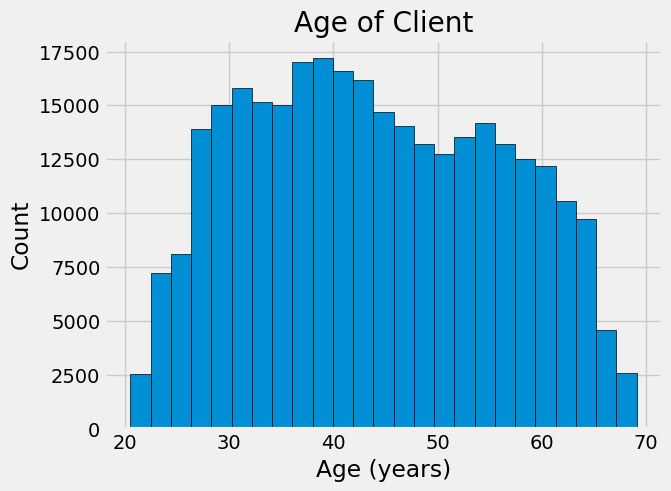

In [73]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(app_train['DAYS_BIRTH'] / -365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

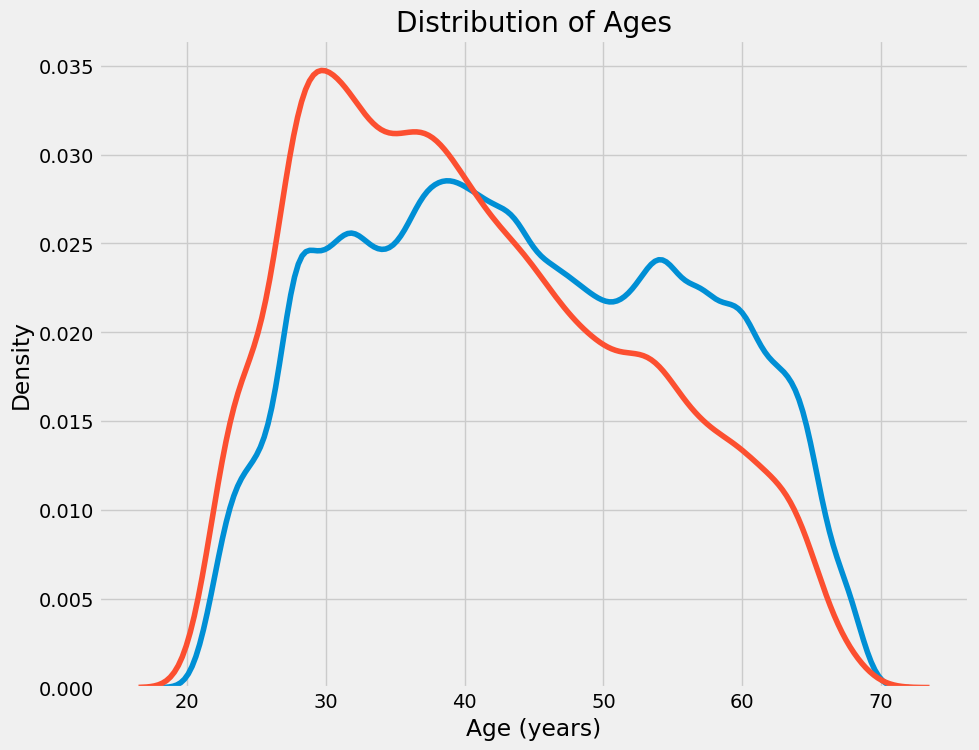

In [74]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / -365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / -365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

In [80]:
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / -365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,-9461,25.920548,"(25.0, 30.0]"
1,0,-16765,45.931507,"(45.0, 50.0]"
2,0,-19046,52.180822,"(50.0, 55.0]"
3,0,-19005,52.068493,"(50.0, 55.0]"
4,0,-19932,54.608219,"(50.0, 55.0]"
5,0,-16941,46.413699,"(45.0, 50.0]"
6,0,-13778,37.747945,"(35.0, 40.0]"
7,0,-18850,51.643836,"(50.0, 55.0]"
8,0,-20099,55.065753,"(55.0, 60.0]"
9,0,-14469,39.641096,"(35.0, 40.0]"
